## Install and load modules

Zipline only works with an older version of pandas. It is necessary to downgrade to the version of pandas that is 0.22.0. We also need to download zipline.

In [1]:
#!pip install Quantopian
#!pip install zipline


In [2]:
import pytz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
#import zipfile
#import zipline
import numpy as np
#from zipline.api import order, record, symbol
#from zipline.assets import Equity, Future
#from zipline import run_algorithm
from collections import OrderedDict
from datetime import datetime


## Load and Prelimenary Analysis of Data

In [3]:
# Stock in our portfolio
stocks  = ["AAPL", "AMZN", "BA", "FB", "GOOG", "MA", "MSFT", "NVDA", "UNH", "V"]

# Calculate the weekly and yearly returns for stocks
stockList = []
# Creates a dataframe from CSV and saves to a list
for stock in stocks:
    df = pd.read_csv("{}.csv".format(stock), index_col =0, parse_dates=['Date'])
    stockList.append(df)   
# Creates a dataframe from the list of dataframes
stockdf = pd.concat(stockList, keys=stocks)
stockdf = stockdf.reset_index()
stockdf.rename(index=str, columns={"level_0":"ticker"}, inplace=True)
# Impute missing values
stockdf

,ticker,Date,open,high,low,close,adj close,volume
0,AAPL,2018-01-02,170.16,172.30,169.26,172.26,168.34,25555900
1,AAPL,2018-01-03,172.53,174.55,171.96,172.23,168.31,29517900
2,AAPL,2018-01-04,172.54,173.47,172.08,173.03,169.09,22434600
3,AAPL,2018-01-05,173.44,175.37,173.05,175.00,171.02,23660000
4,AAPL,2018-01-08,174.35,175.61,173.93,174.35,170.38,20567800
5,AAPL,2018-01-09,174.55,175.06,173.41,174.33,170.36,21584000
6,AAPL,2018-01-10,173.16,174.30,173.00,174.29,170.32,23959900
7,AAPL,2018-01-11,174.59,175.49,174.49,175.28,171.29,18667700
8,AAPL,2018-01-12,176.18,177.36,175.65,177.09,173.06,25226000
9,AAPL,2018-01-16,177.90,179.39,176.14,176.19,172.18,29565900


In [43]:
# To computer the covariance matrix , turn data into long format with pivot table
datawide = pd.pivot_table(stockdf, values='adj close', index=['Date'], columns='ticker')
returns = np.log(datawide).diff()
returns.iloc[0:21]

ticker,AAPL,AMZN,BA,FB,GOOG,MA,MSFT,NVDA,UNH,V
Date,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.000178,0.012694,0.003224,0.017756,0.016280,0.012470,0.004642,0.063763,0.010433,0.009917
2018-01-04,0.004624,0.004466,-0.003814,-0.001843,0.003615,0.012899,0.008749,0.005236,0.004315,0.003661
2018-01-05,0.011349,0.016033,0.040209,0.013579,0.014466,0.020502,0.012284,0.008434,0.018903,0.023731
2018-01-08,-0.003749,0.014322,0.004229,0.007624,0.004264,0.003039,0.001046,0.030193,-0.017499,0.003986
2018-01-09,-0.000117,0.004665,0.026334,-0.002180,-0.000614,0.001390,-0.000697,-0.000272,0.004967,-0.001948
2018-01-10,-0.000235,0.001300,0.005745,-0.000160,-0.003305,0.002270,-0.004544,0.007803,-0.007459,-0.001018
2018-01-11,0.005679,0.017661,0.024258,-0.000373,0.002636,0.006592,0.003031,0.001796,0.005295,0.007189
2018-01-12,0.010280,0.022093,0.024358,-0.045767,0.015029,0.008723,0.017083,-0.004901,0.014296,0.002021


## Log Return

In [5]:
logret = np.log(datawide).diff()
logret.iloc[0:21]

ticker,AAPL,AMZN,BA,FB,GOOG,MA,MSFT,NVDA,UNH,V
Date,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,-0.000178,0.012694,0.003224,0.017756,0.016280,0.012470,0.004642,0.063763,0.010433,0.009917
2018-01-04,0.004624,0.004466,-0.003814,-0.001843,0.003615,0.012899,0.008749,0.005236,0.004315,0.003661
2018-01-05,0.011349,0.016033,0.040209,0.013579,0.014466,0.020502,0.012284,0.008434,0.018903,0.023731
2018-01-08,-0.003749,0.014322,0.004229,0.007624,0.004264,0.003039,0.001046,0.030193,-0.017499,0.003986
2018-01-09,-0.000117,0.004665,0.026334,-0.002180,-0.000614,0.001390,-0.000697,-0.000272,0.004967,-0.001948
2018-01-10,-0.000235,0.001300,0.005745,-0.000160,-0.003305,0.002270,-0.004544,0.007803,-0.007459,-0.001018
2018-01-11,0.005679,0.017661,0.024258,-0.000373,0.002636,0.006592,0.003031,0.001796,0.005295,0.007189
2018-01-12,0.010280,0.022093,0.024358,-0.045767,0.015029,0.008723,0.017083,-0.004901,0.014296,0.002021


## Estimate Expected Return

In [6]:
mu = logret[1:].mean()
mu

ticker
AAPL   -0.000332
AMZN    0.000874
BA      0.000334
FB     -0.001241
GOOG   -0.000107
MA      0.000838
MSFT    0.000692
NVDA   -0.001595
UNH     0.000485
V       0.000565
dtype: float64

## Estimate Covariance Matrix
We use two function here: 
sklearn.covariance.LedoitWolf: for large sample size 
sklearn.covariance.OAS: small sample size, assumption under Gaussian
Advantage: 

In [7]:
# using Numpy cov()
sigma = logret.cov()
sigma

ticker,AAPL,AMZN,BA,FB,GOOG,MA,MSFT,NVDA,UNH,V
ticker,,,,,,,,,,
AAPL,0.000330,0.000273,0.000190,0.000195,0.000220,0.000236,0.000226,0.000295,0.000141,0.000205
AMZN,0.000273,0.000521,0.000252,0.000322,0.000305,0.000324,0.000315,0.000463,0.000177,0.000284
BA,0.000190,0.000252,0.000392,0.000152,0.000207,0.000216,0.000210,0.000328,0.000163,0.000202
FB,0.000195,0.000322,0.000152,0.000609,0.000266,0.000264,0.000239,0.000381,0.000102,0.000220
GOOG,0.000220,0.000305,0.000207,0.000266,0.000318,0.000250,0.000263,0.000367,0.000149,0.000230
MA,0.000236,0.000324,0.000216,0.000264,0.000250,0.000322,0.000262,0.000368,0.000154,0.000262
MSFT,0.000226,0.000315,0.000210,0.000239,0.000263,0.000262,0.000318,0.000353,0.000163,0.000243
NVDA,0.000295,0.000463,0.000328,0.000381,0.000367,0.000368,0.000353,0.001012,0.000179,0.000335
UNH,0.000141,0.000177,0.000163,0.000102,0.000149,0.000154,0.000163,0.000179,0.000213,0.000143


In [8]:
#LW
from sklearn.covariance import LedoitWolf
X = logret.dropna()
LW_cov = LedoitWolf().fit(X)
sigma_LW = LW_cov.covariance_
sigma_LW = pd.DataFrame(sigma_LW)
sigma_LW
#cov.location_

,0,1,2,3,4,5,6,7,8,9
0,0.000332,0.000262,0.000182,0.000187,0.000212,0.000227,0.000217,0.000283,0.000135,0.000196
1,0.000262,0.000516,0.000242,0.000309,0.000293,0.000311,0.000303,0.000445,0.000170,0.000272
2,0.000182,0.000242,0.000392,0.000146,0.000199,0.000207,0.000201,0.000315,0.000156,0.000194
3,0.000187,0.000309,0.000146,0.000600,0.000256,0.000253,0.000229,0.000365,0.000098,0.000211
4,0.000212,0.000293,0.000199,0.000256,0.000320,0.000240,0.000252,0.000353,0.000143,0.000221
5,0.000227,0.000311,0.000207,0.000253,0.000240,0.000324,0.000251,0.000353,0.000148,0.000252
6,0.000217,0.000303,0.000201,0.000229,0.000252,0.000251,0.000321,0.000339,0.000157,0.000233
7,0.000283,0.000445,0.000315,0.000365,0.000353,0.000353,0.000339,0.000987,0.000171,0.000321
8,0.000135,0.000170,0.000156,0.000098,0.000143,0.000148,0.000157,0.000171,0.000220,0.000138
9,0.000196,0.000272,0.000194,0.000211,0.000221,0.000252,0.000233,0.000321,0.000138,0.000261


In [9]:
#OAS
from sklearn.covariance import OAS
X = logret.dropna()
OAS_cov = OAS().fit(X)
sigma_OAS = OAS_cov.covariance_
sigma_OAS = pd.DataFrame(sigma_OAS)
sigma_OAS
#cov.location_

,0,1,2,3,4,5,6,7,8,9
0,0.000330,0.000267,0.000186,0.000191,0.000216,0.000231,0.000221,0.000289,0.000138,0.000200
1,0.000267,0.000517,0.000247,0.000315,0.000299,0.000317,0.000309,0.000454,0.000174,0.000278
2,0.000186,0.000247,0.000391,0.000149,0.000203,0.000212,0.000205,0.000321,0.000159,0.000198
3,0.000191,0.000315,0.000149,0.000604,0.000261,0.000258,0.000234,0.000373,0.000100,0.000215
4,0.000216,0.000299,0.000203,0.000261,0.000318,0.000245,0.000257,0.000360,0.000146,0.000225
5,0.000231,0.000317,0.000212,0.000258,0.000245,0.000322,0.000256,0.000360,0.000151,0.000257
6,0.000221,0.000309,0.000205,0.000234,0.000257,0.000256,0.000319,0.000346,0.000160,0.000238
7,0.000289,0.000454,0.000321,0.000373,0.000360,0.000360,0.000346,0.000999,0.000175,0.000328
8,0.000138,0.000174,0.000159,0.000100,0.000146,0.000151,0.000160,0.000175,0.000216,0.000140
9,0.000200,0.000278,0.000198,0.000215,0.000225,0.000257,0.000238,0.000328,0.000140,0.000258


### Compare Estimated Sigmas

## Portfolio optimization: 

In [10]:
import cvxpy as cvx
from cvxpy import *
s, _ = sigma_LW.shape
#gamma = cvx.Parameter(nonneg=True)
w1 = cvx.Variable(s)
risk = cvx.quad_form(w1, sigma_LW.values)
prob1 = cvx.Problem(cvx.Minimize(risk), 
               [cvx.sum(w1) == 1])
prob1.solve()
w1.value

array([ 0.16796193, -0.15430703,  0.09410548,  0.1307955 ,  0.08947639,
       -0.08585629, -0.02621356, -0.08894132,  0.50156112,  0.37141776])

In [11]:
w1.value.sum()

1.0

In [12]:
np.dot(mu.values,w1.value)

0.0001738211740639236

In [13]:
w2 = cvx.Variable(s)
risk = cvx.quad_form(w2, sigma_LW.values)
ret = mu.values*w2
prob2 = cvx.Problem(cvx.Maximize(ret - risk), 
               [cvx.sum(w2) == 1, 
                w2 >= 0])
prob2.solve()
w2.value

array([-3.06090201e-23,  1.41737517e-01,  2.46213520e-23,  2.02708897e-22,
       -1.32348067e-22,  8.58262483e-01, -2.92759666e-23,  1.84773460e-25,
       -6.79938740e-24, -2.43924134e-23])

In [14]:
w2.value.sum()

1.0

In [15]:
np.dot(mu.values,w2.value)

0.0008432981060506996

In [16]:
w3 = cvx.Variable(s)
risk = cvx.quad_form(w3, sigma_LW.values)
prob3 = cvx.Problem(cvx.Minimize(risk), 
               [
                   cvx.sum(w3) == 1,
                   mu.values*w3 >= 0.001
               ])
prob3.solve()
w3.value

array([-0.00686946, -0.02742798,  0.09519756,  0.00201091, -0.00147617,
        0.15309175,  0.1085767 , -0.20615338,  0.48739951,  0.39565055])

In [17]:
w3.value.sum()

0.9999999999999998

In [18]:
np.dot(mu.values,w3.value)

0.001

In [19]:
#Portfolio Return, Portfolio Volitality
RP1 = np.dot(mu.values,w1.value)
w1_matrix = np.asmatrix(w1.value)
sigma_LW_matrix = np.asmatrix(sigma_LW)
SP1 = w1_matrix * sigma_LW_matrix *w1_matrix.T

RP2 = np.dot(mu.values,w2.value)
w2_matrix = np.asmatrix(w2.value)
SP2 = w2_matrix * sigma_LW_matrix *w2_matrix.T

RP3 = np.dot(mu.values,w3.value)
w3_matrix = np.asmatrix(w3.value)
SP3 = w3_matrix * sigma_LW_matrix *w3_matrix.T

x = [RP1, RP2,RP3]
y = [SP1,SP2,SP3]
type(x)

list

(-0.0025, 0.0025)

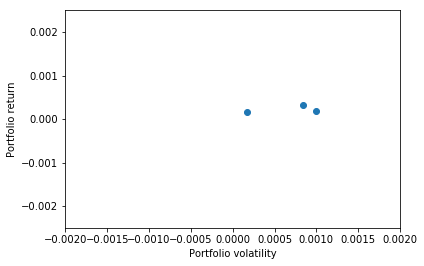

In [20]:
plt.scatter(np.array(x),np.array(y))
plt.xlabel('Portfolio volatility')
plt.ylabel('Portfolio return')
plt.xlim((-0.002, 0.002))
plt.ylim((-0.0025, 0.0025))

## Make investment

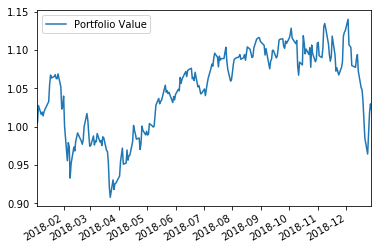

In [21]:
earned = np.dot(logret.fillna(method='bfill').values, w1.value)
earnedcp = (1+earned[1:]).cumprod()
ecp = pd.DataFrame(data=earnedcp.T, index=logret.index.values[1:], columns=['Portfolio Value'])
ecp.plot();

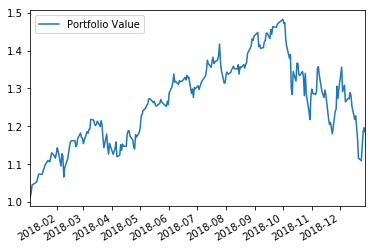

In [22]:
earned = np.dot(logret.fillna(method='bfill').values, w2.value)
earnedcp = (1+earned[1:]).cumprod()
ecp = pd.DataFrame(data=earnedcp.T, index=logret.index.values[1:], columns=['Portfolio Value'])
ecp.plot();

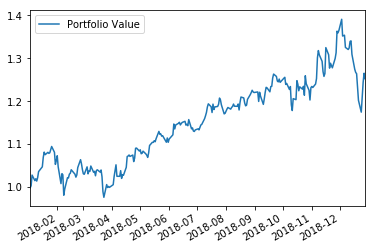

In [23]:
earned = np.dot(logret.fillna(method='bfill').values, w3.value)
earnedcp = (1+earned[1:]).cumprod()
ecp = pd.DataFrame(data=earnedcp.T, index=logret.index.values[1:], columns=['Portfolio Value'])
ecp.plot();

In [24]:
period1=logret.iloc[0:21]
period1_mu = period1[1:].mean()
X = period1.dropna()
period1_LW_cov = LedoitWolf().fit(X)
period1_sigma_LW = period1_LW_cov.covariance_
period1_sigma_LW = pd.DataFrame(sigma_LW)
period1_sigma_LW
period1_w2 = cvx.Variable(s)
risk = cvx.quad_form(period1_w2, period1_sigma_LW.values)
ret = period1_mu.values*period1_w2
prob2 = cvx.Problem(cvx.Maximize(ret - risk), 
               [cvx.sum(period1_w2) == 1, 
                period1_w2 >= 0])
prob2.solve()
period1_w2.value

array([-1.06663982e-23,  4.60391924e-01,  6.35525967e-23, -1.81925300e-23,
       -7.39912016e-23, -1.56396093e-23, -1.44862913e-23,  5.39608076e-01,
       -5.04456668e-24, -2.38181387e-22])

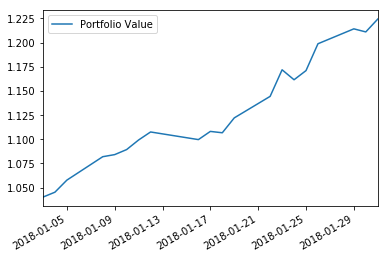

In [25]:
earned = np.dot(period1.fillna(method='bfill').values, period1_w2.value)
earnedcp = (1+earned[1:]).cumprod()
ecp = pd.DataFrame(data=earnedcp.T, index=period1.index.values[1:], columns=['Portfolio Value'])
ecp.plot();

In [26]:
period = logret.iloc[0:21*i]
    period_mu = period1[1:].mean()
    X = period.dropna()
    period_LW_cov = LedoitWolf().fit(X)
    period_sigma_LW = period_LW_cov.covariance_
    period_sigma_LW = pd.DataFrame(sigma_LW)
    period_w2 = cvx.Variable(s)
    risk = cvx.quad_form(period_w2, period_sigma_LW.values)
    ret = period1_mu.values*period_w2
    prob2 = cvx.Problem(cvx.Maximize(ret - risk), 
               [cvx.sum(period1_w2) == 1, 
                period1_w2 >= 0])
    prob2.solve()
    print(period1_w2.value)
period1=logret.iloc[0:42]
period1_mu = period1[1:].mean()
X = period1.dropna()
period1_LW_cov = LedoitWolf().fit(X)
period1_sigma_LW = period1_LW_cov.covariance_
period1_sigma_LW = pd.DataFrame(sigma_LW)
period1_sigma_LW
period1_w2 = cvx.Variable(s)
risk = cvx.quad_form(period1_w2, period1_sigma_LW.values)
ret = period1_mu.values*period1_w2
prob2 = cvx.Problem(cvx.Maximize(ret - risk), 
               [cvx.sum(period1_w2) == 1, 
                period1_w2 >= 0])
prob2.solve()
period1_w2.value

array([-7.96781116e-25,  1.00000000e+00, -1.95051382e-22, -4.08643346e-26,
        1.10641544e-22,  2.21738434e-22,  1.10621299e-22, -1.64549045e-22,
        1.09128917e-22,  1.10315098e-22])

In [38]:
for i in range(1,13):
    period1 = logret.iloc[0:21*i]
    period1_mu = period1[1:].mean()
    X = period1.dropna()
    period1_LW_cov = LedoitWolf().fit(X)
    period1_sigma_LW = period1_LW_cov.covariance_
    period1_sigma_LW = pd.DataFrame(sigma_LW)
    period1_sigma_LW
    period1_w2 = cvx.Variable(s)
    risk = cvx.quad_form(period1_w2, period1_sigma_LW.values)
    ret = period1_mu.values*period1_w2
    prob2 = cvx.Problem(cvx.Maximize(ret - risk), 
               [cvx.sum(period1_w2) == 1, 
                period1_w2 >= 0])
    prob2.solve()
    print(period1_w2.value)

[-1.06663982e-23  4.60391924e-01  6.35525967e-23 -1.81925300e-23
 -7.39912016e-23 -1.56396093e-23 -1.44862913e-23  5.39608076e-01
 -5.04456668e-24 -2.38181387e-22]
[-7.96781116e-25  1.00000000e+00 -1.95051382e-22 -4.08643346e-26
  1.10641544e-22  2.21738434e-22  1.10621299e-22 -1.64549045e-22
  1.09128917e-22  1.10315098e-22]
[2.08846313e-23 1.00000000e+00 1.33526075e-22 2.40300404e-22
 1.88528227e-23 5.20531311e-23 1.79520454e-23 9.26120815e-23
 2.70894031e-23 1.31128978e-22]
[-1.12163698e-22  1.00000000e+00 -1.12109453e-22  1.10971852e-22
 -5.34881992e-25 -1.11475138e-22 -5.78318516e-25  2.86447917e-24
 -2.70018585e-24 -5.65222051e-23]
[1.74679471e-23 1.00000000e+00 1.02134891e-22 1.25817422e-22
 1.56030876e-23 1.67026020e-22 1.81431011e-22 2.01098180e-22
 2.30704538e-23 1.68012300e-23]
[-9.26228614e-23  1.00000000e+00 -9.11046323e-23 -2.06398152e-22
 -9.45435387e-23  7.06983800e-23 -3.97793392e-23  7.57050947e-24
 -8.68469083e-23 -9.33143447e-23]
[2.21179373e-22 1.00000000e+00 2.767

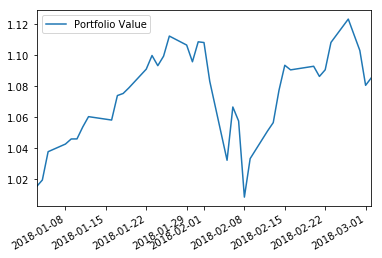

In [28]:
earned = np.dot(period1.fillna(method='bfill').values, period1_w2.value)
earnedcp = (1+earned[1:]).cumprod()
ecp = pd.DataFrame(data=earnedcp.T, index=period1.index.values[1:], columns=['Portfolio Value'])
ecp.plot();

## Make data compatible with Zipline

In [29]:
# Store the different datasets
data = {}

# Iterate to load stock data from csv
for stock in stocks:
    data[stock] = pd.read_csv("{}.csv".format(stock), index_col =0, parse_dates=['Date'])
    data[stock] = data[stock][["open","high","low","close","adj close","volume"]]
    data[stock] = data[stock].resample("1d").mean()
    data[stock].fillna(method='ffill', inplace = True)

In [30]:
# Convert data to panel
StockPrice = pd.Panel(data)
StockPrice.minor_axis = ["open","high","low","close","adj close","volume"]
StockPrice.major_axis = StockPrice.major_axis.tz_localize(pytz.utc)
print(StockPrice)

<class 'pandas.core.panel.Panel'>
Dimensions: 10 (items) x 361 (major_axis) x 6 (minor_axis)
Items axis: AAPL to V
Major_axis axis: 2018-01-02 00:00:00+00:00 to 2018-12-28 00:00:00+00:00
Minor_axis axis: open to volume


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3296: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  exec(code_obj, self.user_global_ns, self.user_ns)


Date
2018-01-02    1065.00
2018-01-03    1082.48
2018-01-04    1086.40
2018-01-05    1102.23
2018-01-06    1102.23
2018-01-07    1102.23
2018-01-08    1106.94
2018-01-09    1106.26
2018-01-10    1102.61
2018-01-11    1105.52
2018-01-12    1122.26
2018-01-13    1122.26
2018-01-14    1122.26
2018-01-15    1122.26
2018-01-16    1121.76
2018-01-17    1131.98
2018-01-18    1129.79
2018-01-19    1137.51
2018-01-20    1137.51
2018-01-21    1137.51
2018-01-22    1155.81
2018-01-23    1169.97
2018-01-24    1164.24
2018-01-25    1170.37
2018-01-26    1175.84
2018-01-27    1175.84
2018-01-28    1175.84
2018-01-29    1175.58
2018-01-30    1163.69
2018-01-31    1169.94
               ...   
2018-11-29    1088.30
2018-11-30    1094.43
2018-12-01    1094.43
2018-12-02    1094.43
2018-12-03    1106.43
2018-12-04    1050.82
2018-12-05    1050.82
2018-12-06    1068.73
2018-12-07    1036.58
2018-12-08    1036.58
2018-12-09    1036.58
2018-12-10    1039.55
2018-12-11    1051.75
2018-12-12    1063.68
2018-

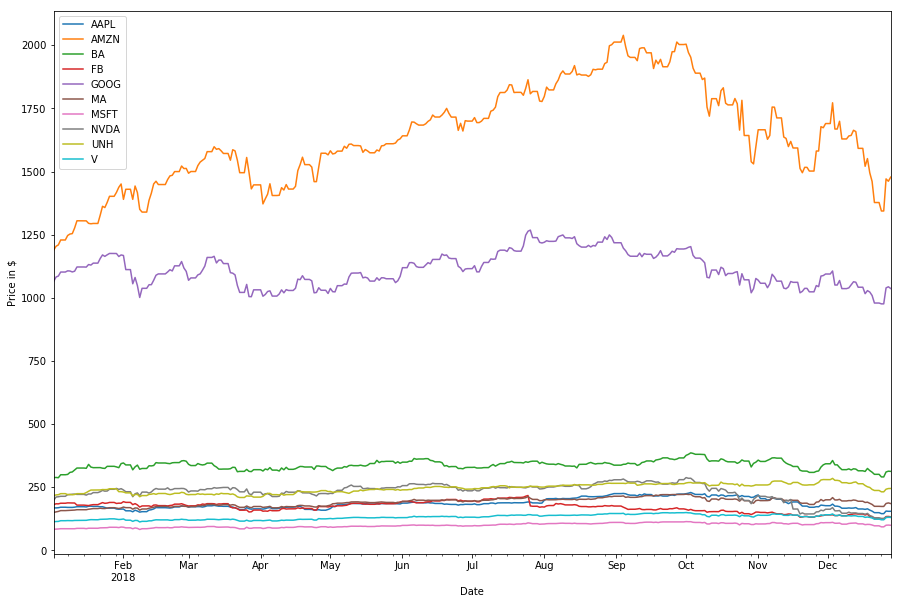

In [31]:
plt.figure(figsize=(15,10))
for stock in stocks:
    data[stock]['adj close'].plot()
plt.legend(stocks)
plt.ylabel("Price in $")
data['GOOG']['close']

In [32]:
# I dont think this does anything
%load_ext zipline

ModuleNotFoundError: No module named 'zipline'

## Set constraints 

In [ ]:
# Constraints for our algorithm
initial_capital = 10000
# Time frame for our algorithm
startDate = datetime(2018,1,1,0,0,0,0,pytz.utc)
endDate = datetime(2018,12,1,0,0,0,0,pytz.utc)
# Trading calendar used for algorithm
tradingCalendar = "NYSE"


## Run Algorithm

In [ ]:
# Define necessary two functions to run algorithm
def initialize(context):
    context.assest = symbol('GOOG')
    
def handle_data(context, data):
    order(symbol('GOOG'),10)
    record(GOOG = data.current(symbol('GOOG'),'price'))



In [ ]:
perf = zipline.run_algorithm(start= startDate,
                            end= endDate,
                            initialize=initialize,
                            data_frequency='daily',
                            capital_base= initial_capital,
                            handle_data=handle_data,
                            data=StockPrice)
perf.head(5)
perf['benchmark_period_return'].agg(sum)